## Tratamiento de Variables Categoricas


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression

In [3]:
mainpath="/Volumes/Developer/Study/Udemy/Machine Learning/python-ml-course/datasets"
filename="ecom-expense/Ecom Expense.csv"
fullpath= os.path.join(mainpath, filename)

In [4]:
df = pd.read_csv(fullpath)

In [5]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [6]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix="City")

In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
# #Elimino los espacios
# for i in range(len(column_names)):
#     column_names[i]= column_names[i].strip()

# column_names

In [11]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [12]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [13]:
feature_cols = [ "Transaction Time","Monthly Income", "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3","Record"]

In [14]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [15]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [16]:
print(lm.intercept_)
print(lm.coef_)

-79.41713029853963
[ 1.54946125e-01  1.47538980e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [17]:
list(zip(feature_cols, lm.coef_))

[('Transaction Time', 0.1549461254904773),
 ('Monthly Income', 0.14753898049204883),
 ('Gender_Female', -131.02501325554564),
 ('Gender_Male', 131.02501325554582),
 ('City_Tier 1', 76.76432601049534),
 ('City_Tier 2', 55.138974309232424),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445642)]

In [18]:
lm.score(X,Y)

0.9179923586131016

In [19]:
"""Escribiendola manual"""
# df_new['predict'] = -79.41713029853963 + df_new['Transaction Time']*0.1549461254904773+ df_new['Monthly Income']*0.14753898049204883+ df_new['Gender_Female']*(-131.02501325554564)+ df_new['Gender_Male']*(131.02501325554582)+ df_new['City_Tier 1']*76.76432601049534+ df_new['City_Tier 2']*55.138974309232424+ df_new['City_Tier 3']*(-131.90330031972783)+ df_new['Record']*772.2334457445642

"""Utilizando la formula"""
df_new['predict'] = lm.predict(df_new[feature_cols])

In [20]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,predict
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [21]:
SSD = np.sum((df_new['predict']-df_new['Total Spend'])**2)
SSD

1517733985.3408165

In [22]:
RSE= np.sqrt( SSD / (len(df_new)+len(feature_cols)-1))
RSE

800.4151480183347

In [23]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [24]:
error= RSE/sales_mean
error

0.12987055602423286

## Eliminar variables dummy redundantes

In [27]:
dummy_gender = pd.get_dummies(df['Gender'],prefix='Gender').iloc[:,1:]
dummy_gender.head()


,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [28]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [30]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0


In [31]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [32]:
feature_cols = [ "Transaction Time","Monthly Income", "Gender_Male", "City_Tier 2", "City_Tier 3","Record"]

In [33]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [34]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [35]:
lm.score(X,Y)

0.9179923586131016

In [36]:
df_new['predict'] = lm.predict(df_new[feature_cols])

In [37]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3,predict
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0,3581.980335


In [38]:
list(zip(feature_cols, lm.coef_))

[('Transaction Time', 0.1549461254904773),
 ('Monthly Income', 0.14753898049204883),
 ('Gender_Male', 262.0500265110935),
 ('City_Tier 2', -21.625351701262208),
 ('City_Tier 3', -208.6676263302236),
 ('Record', 772.233445744564)]

In [39]:
SSD = np.sum((df_new['predict']-df_new['Total Spend'])**2)
SSD

1517733985.3408165

In [40]:
RSE= np.sqrt( SSD / (len(df_new)+len(feature_cols)-1))
RSE

800.7532325732285

In [41]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [42]:
error= RSE/sales_mean
error

0.1299254115941655

## Transformación de variables para conseguir una relación no lineal

Se recomienda comenzar con un matriz de scatter plot para verificar  si la relación es lineal con todas y cada una de las variables predictoras.

In [43]:
mainpath="/Volumes/Developer/Study/Udemy/Machine Learning/python-ml-course/datasets"
filename="auto/auto-mpg.csv"
path= os.path.join(mainpath, filename)

In [44]:
data_auto= pd.read_csv(path)
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [45]:
data_auto.shape

(406, 9)

In [46]:
data_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [47]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

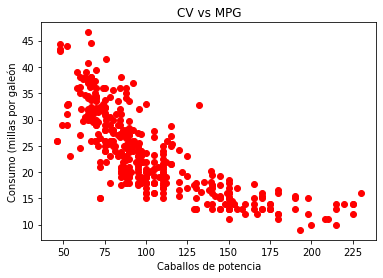

In [48]:
%matplotlib inline
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeón")
plt.title("CV vs MPG")


### Modelo de regresión lineal

* mpg = a+ b * horsepower

In [117]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data = pd.DataFrame(X)

In [118]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

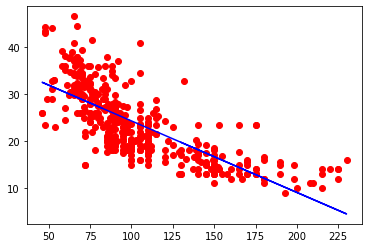

In [119]:
%matplotlib inline
plt.plot(X,Y, 'ro')
new_y =lm.predict(X_data)
plt.plot(X, new_y , color='blue')

In [120]:
lm.score(X_data, Y)

0.574653340645025

In [121]:
SSD = np.sum( (Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(data_auto) - 1))
y_mean = np.mean(Y)
error = RSE/ y_mean
SSD, RSE, y_mean, error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

### Modelo de regresión cuadratico

* mpg = a+ b * horsepower ^2



In [122]:
X_data = X**2
X_data = pd.DataFrame(X_data)

In [123]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [124]:
lm.score(X_data, Y)

0.4849887034823205

In [125]:
SSD = np.sum( (Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(data_auto) - 1))
y_mean = np.mean(Y)
error = RSE/ y_mean
SSD, RSE, y_mean, error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

### Modelo de regresión lineal y cuadratico 

* mpg = a+ b * horsepower + c horsepower ^2

In [126]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [127]:
poly = PolynomialFeatures(degree=2)

In [128]:

X_data = poly.fit_transform(pd.DataFrame(X))

In [129]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [130]:
lm.score(X_data, Y)

0.6439066584257469

In [131]:
lm.intercept_

55.02619244708036

In [132]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [133]:
SSD = np.sum( (Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(data_auto) - 1))
y_mean = np.mean(Y)
error = RSE/ y_mean
SSD, RSE, y_mean, error

(8636.180643524502, 4.61778115803654, 23.51457286432162, 0.1963795466190689)

In [134]:
def regresion_validation(X_data,Y,Y_pred):
    SSD = np.sum( (Y - Y_pred)**2)
    RSE = np.sqrt(SSD / (len(X_data) - 1))
    y_mean = np.mean(Y)
    error = RSE/ y_mean
    print("SSD: {}, RSE: {}, mean: {}, error: {}%".format(SSD, RSE, y_mean, error*100))

In [135]:
def polynomial_model(x,y,n):
    for d in range(2,n+1):
        poly = PolynomialFeatures(degree=d)
        X_data = poly.fit_transform(x)
        lm = linear_model.LinearRegression()
        lm.fit(X_data, y)
        print("Regresion de grado "+str(d))
        print("R2: {}".format(lm.score(X_data, y)))
        print(lm.intercept_)
        print(lm.coef_)
        regresion_validation(X_data,y , lm.predict(X_data))
        print()
    

In [136]:
polynomial_model(pd.DataFrame(X),Y,5)

Regresion de grado 2
R2: 0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, mean: 23.51457286432162, error: 19.63795466190689%

Regresion de grado 3
R2: 0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, mean: 23.51457286432162, error: 19.622473106036676%

Regresion de grado 4
R2: 0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, mean: 23.51457286432162, error: 19.55891250126878%

Regresion de grado 5
R2: 0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD: 8373.171393636556, RSE: 4.546921735442387, mean: 23.51457286432162, error: 19.336612073193884%



## El problema de los outliers